In [49]:
#all of my imports 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [3]:
#load data
df = pd.read_csv('review.tsv', header=0, delimiter='\t', quoting=3)

In [4]:
# Print the shape
print(df.shape)

(25000, 3)


In [5]:
#print data frame
print(df.head())

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...


I think my biggest problem with this data has been trying to stem it correctly. I've tried 3 different methods and none seem to do it correctly. If you could tell me what I'm doing wrong, I would appreciate it. I've included the other two methods that I've attempted here:

results_2 = []
stop_words = set(stopwords.words('english'))
symbols = "!\"#$%&()*+-./:;,<=>?@[\]^_'{|}~\n0123456789"
def clean(review):
    #going through each review
    for r in review:
        print(r)
        word = r.split(' ')
        new = []
        val = ' '
        #going through each word in a review
        for w in word: 
            #going through each character in a word
            for s in w:
                #if symbol is found from list, replace with a  blank
                if s in symbols:
                    w = w.replace(s, ' ')
            #converts to lowercase
            w = w.lower()
            #remove spaces
            w = w.strip()
            #if there's no space and at least 1 character
            if w != chr(32) and len(w)>1:
                #if not spot_word, add it to the list. 
                if w not in stop_words:
                    val += ps.stem(w)
                    val +=' '
        results_2.append(val)
    return results_2
clean_review = clean(df['review'])
#tranferring the clean data back into the dataframe
df['review'] = clean_review

----------------------------------------------
df['review'] = df['review'].str.split()
df['review'] = df['review'].apply(lambda x: [stemmer.stem(y) for y in x])

In [6]:
#stemming the data
#but it's not coming out corrently??? Not sure what I did wrong.
#it's replaced several letters with i in it's place and also removed certain words all together? 
#I can't see where in the code that it's doing this. 

corpus = []
for i in range(df.shape[0]):
    # Remove HTML tags and characters
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review = re.sub('<[^>]*>', '', review)
    # Convert to lowercase
    review = review.lower().split()
    # Remove stop words and stem words
    review = [stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Print the stemmed corpus
print(corpus[:5])

['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one lev

In [7]:
#load x variables with columns
df1 = df.drop('review', axis = 1)
#target data
df2 = df['review']

In [8]:
# Split the data into training and test sets with 20/80 split
x_train, x_test, y_train, y_test = train_test_split(corpus, df['sentiment'], test_size=0.2, random_state=0)

In [9]:
# Print the shapes of the training and test sets
print(len(x_train))
print(len(x_test))

20000
5000


In [10]:
#trying to apply the tfidf vecotrizer to training set
#why does this blue box pop up whenever I run the tfidf??? 
tfidf = TfidfVectorizer()
tfidf.fit(x_train)

TfidfVectorizer()

In [11]:
#applying tfidf to test set
x_train_tfidf = tfidf.transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [12]:
#verifiying shape is correct
print(x_train_tfidf.shape)

(20000, 44594)


In [13]:
#trying to run a logistics model on the training set but only this blue box shows up??? Is this correct?? 
log_reg = LogisticRegression()
log_reg.fit(x_train_tfidf, y_train)

LogisticRegression()

In [14]:
# Split the data into training and test sets with 30/70
x_train, x_test, y_train, y_test = train_test_split(corpus, df['sentiment'], test_size=0.3, random_state=42)

In [15]:
#verifying it was split correctly
print(len(x_train))
print(len(x_test))

17500
7500


In [16]:
#trying to apply the tfidf vecotrizer to training set
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)

In [17]:
x_train_tfidf

<17500x42164 sparse matrix of type '<class 'numpy.float64'>'
	with 1648730 stored elements in Compressed Sparse Row format>

In [18]:
# Print the shape of the TF-IDF matrix
print(x_train_tfidf.shape)

(17500, 42164)


In [19]:
# Apply the TfidfVectorizer to the test set
x_test_tfidf = tfidf.transform(x_test)

In [20]:
# Printing the shape again. still wrong
print(x_test_tfidf.shape)

(7500, 42164)


In [24]:
#trying to run the logistics regression


log_reg = LogisticRegression(C=1.0)


In [25]:
#am I doing this wrong or is this issue due to my stemming going wrong? 
#error: ValueError: Expected 2D array, got 1D array instead:
pred = log_reg.fit(x_train_tfidf, y_train).predict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=['read girl soup came peter seller low period watch movi surpris almost noth happen movi seem presenc seller goldi hawn help movi whole movi seem like random film whatev happen without script anyth mayb seen everi movi middl age elder peopl tri hippi one give movi pretti bad name br br seller hawn star much better movi wast time pretti worthless'
 'film pull get go grab attent acknowledg yeah stori open clich funer br br hand judi given materi done great reunion famous pick one pleas team armi platoon theatr group singer band br br movi never stoop cheap sentiment think go swoop anoth direct case point flower sent admir judi br br band member interest group ride clich one jail one found religion one alki one sunk dementia joie de vivr rediscov judi ignit granddaught interest carri us along make us overlook sometim simplist natur plot br br cast talent lesli caron incompar jazzist cleo lain amaz high note last perform joan sim brava joan cute button flirtati ian holm ball olympia dukaki money grab divorc e live highland scotland ghilli whiskey close scene standard hollywoodland fare judgment children star convert fun love support old lover reunit youngster swept old timer music life simpl would watch intend granddaught right hand sometim one love brazen old clich'
 'aw death scene gun fire without make sound charact call fiend tiresom slow move unimagin drivel ok see guy cape hunchback lurk around visual creepi probabl occupi moviego time even one would think would littl imagin verisimilitud even film like kept wait someth happen import peopl stood around make speech act like pose offic picnic bullet previous comment mention perhap best clue would search water spot someon pant pocket'
 ...
 'q could gather irish guy want make movi noth particular movi one night parti hear ex roadi tell classic bit rock n roll lore one gram parson corps stolen lax loyal roadi could honor parson wish cremat joshuatre wow br br great idea movi rock n roll well countri grave rob escap friendship guess could get johnni knoxvill jackass caus kind prank right knoxvill want movi must thought next snatch hand br br stori realli excit need someth knoxvill struggl like psychot girlfirend money parson marri time k one know besid could get christina appleg audienc like idea steal corps well get dad join chase give permiss end parson dad kill fact orphan status tragic childhood key part parson mytholog mytholog make movi creativ problem solv br br uncomfort experi anybodi even vagu knowledg interest subject appleg presenc doubl jar first invent charact bever hill bitch time might well walk around whole movi cell phone hand second kind man would parson ever associ kind harpi fact distort left revers could easili found villain want parson stepfath attempt whisk bodi back home state law would favor divid consider inherit br br music oh music love music hack bridg song chorus forc background end horribl cover hippest new indi band starsailor girlfriend ask unnecessari irresist question movi anyon writer produc director actual gram parson fan well never actual heard gram parson cours blah blah blah learn love factoid read bio onlin anoth guy vouch parson cool say keith richard trip acid togeth wrote wild hors togeth mix bunch fact base movi anoth person ask moral question rewrit histori peopl would know film well real roadi permiss even set parson estat gave permiss peopl got paycheck said great br br realli wonder ask embarass trembl voic truli impass parson geek movi cheapli made million consid origin gram parson fanbas audienc director writer seem think noth figur fanbas though doubt mojo magazin read countri rock music fan would agre bunch brit made guess care cosmic american music even knew exist truth parson flick even right spirit even fit legend least sentiment one song plenti peopl would love told br br mention movi receiv well bunch stone colleg kid slope johnni knoxvill parson fan ignor titl movi jackass fan'
 'expect much saw palm spring film fest weekend altern choic two film sold still held hope sound bit much like bride prejudic l guy fall indian beauti parent conflict blah blah blah b p perfect enjoy film good laugh likabl charact br br bollywood bride none act seem stilt way number charact clich stori seem like could written high school freshman drama student technic sound realli bother seem lot dub dialogu mean lot know sometim necessari sound like half film shot closet becam distract br br two star somewhat generous'
 'cast tv movi tv seri guest star misti row pamela hemsley clevon littl seymour cassel among sever other stori photograph dream kill model cours model peopl start turn dead caus sort complic br br done good thriller enough nuditi violenc get r rate enough good materi engend real interest best describ sort movi gave cabl channel cinemax altern name skinamax realli see point watch unless need see everi sleazi thriller also comment film fill smoke point becom laughabl anyon light'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#y_pred = model.predict(x_test)
#score = accuracy_score(y_test, y_pred)
#score

In [43]:
#accuracy
#print(metrics.accuracy_score(y_test,pred))

the rest of the requirements I was able to find code for it but could not test out due to the above errors. 
The below are my attemps are trying to code the rest of the data. 

In [39]:
#get predicted probabilities
target_prob = log_reg.predict_proba(x_test_tfidf)[:,1]

In [42]:
classifier = svm.SVC(kernel="linear", C=0.01).fit(x_test_tfidf, x_train_tfidf)
np.set_printoptions(precision=2)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [48]:
svc = LinearSVC(C=1.0)

In [50]:
scaler = StandardScaler()

In [53]:
features_standardized = scaler.fit_transform(x_test_tfidf)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [52]:
model = svc.fit(features_standardized, x_test_tfidf)

NameError: name 'features_standardized' is not defined

In [44]:
yhat_classes = model.predict_classes(x_text, verbose=0)

NameError: name 'model' is not defined

In [30]:
#Get the precision, recall, and F1-score for the test set predictions.
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

NameError: name 'yhat_classes' is not defined

In [31]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(t_test, yhat_classes)
print(matrix)

NameError: name 'cohen_kappa_score' is not defined

In [32]:
#create true and false positive rates
f_pos_rate, t_pos_rate, threshold = roc_curve(y_test, target_prob)

NameError: name 'target_prob' is not defined

NameError: name 'f_pos_rate' is not defined

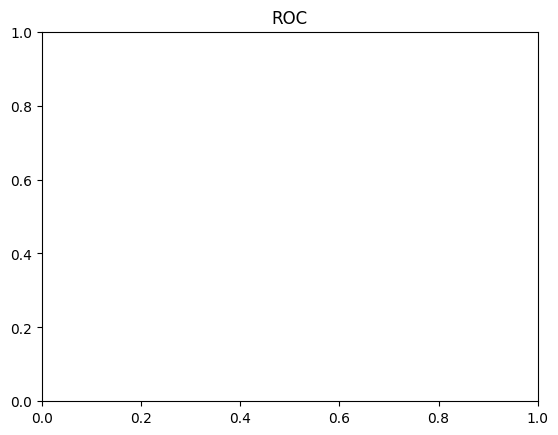

In [38]:
#plot ROC curve
plt.title("ROC")
plt.plot(f_pos_rate, t_pos_rate)
plt.plt([0,1], ls="--")
plt.plt([0,0], [1,0], c = '.7'), plt.plot([1,1], c = '.7')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()